In [ ]:
'''
Importando Bibliotecas:
      pandas = manipulação de dados
      numpy = manipulação de arrays
      matplotlib = visualização de dados em gráficos
      sklearn = algoritmo de aprendizado de máquina para clusterização
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
'''
Gerando nosso Dataframe (X) e Index/Output (y)
'''

data = pd.read_csv("store.csv")
data.set_index ("CustomerID", inplace= True)
df = data [["Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [3]:
'''
Inércia é a tendência a qual os dados podem ser agrupáveis em relação ao seu centroide
Baixa Inércia = Melhor agrupamento, dados mais coesos em relação ao centroide
Alta Inércia = Dados mais dispersos, espaçados em relação ao centroide

              k = pontos possíveis de clusterização
              inércia = distância média entre os pontos e seus centroides
'''


inercia = []
for i in range (1,12):
  kmeans = KMeans (n_clusters=i, random_state=42)
  kmeans.fit(df) # Treino: escolhe pontos possíveis de forma aleatória, atribui pontos ao centroide mais próximo, e repete até ter menos divergências
  inercia.append(kmeans.inertia_) # Define os valores de inércia

inercia

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905,
 18912.01248078515]

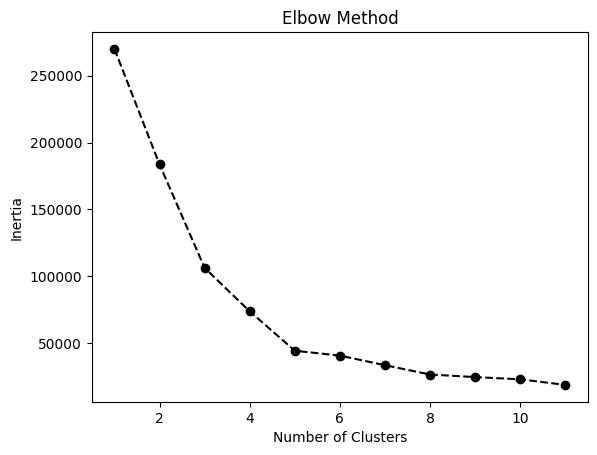

In [4]:
'''
Plotamos um gráfico para observar qual o melhor número de clusters para os dados disponíveis
O ponto onde a curva começa a achatar é o número ideal de clusters, ou seja o cotovelo da curva
'''


plt.plot (range(1,12), inercia,
          marker = 'o',
          linestyle = '--',
          color = 'black')

plt.xlabel ('Number of Clusters')
plt.ylabel ('Inertia')
plt.title ('Elbow Method')
plt.show()

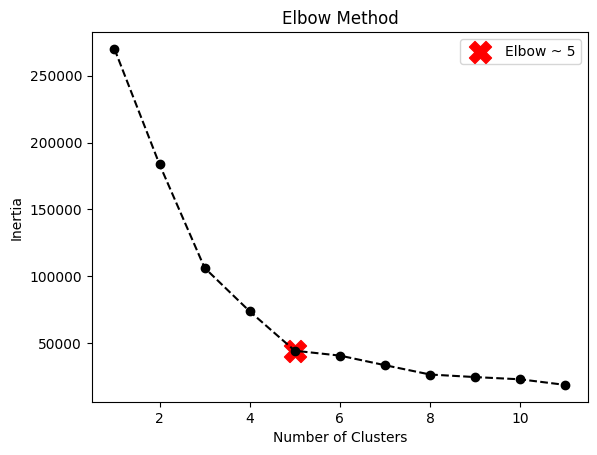

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 12)
y = np.array(inercia)


# Coordenadas da linha que conecta o primeiro e último ponto
start = np.array([x[0], y[0], 0])   # ponto inicial
end   = np.array([x[-1], y[-1], 0]) # ponto final

# Calcula distância perpendicular de cada ponto à linha
distances = []
for xi, yi in zip(x, y):
    point = np.array([xi, yi, 0])
    # vetor do ponto até o início da linha
    vec = point - start
    # vetor da linha
    line_vec = end - start
    # distância perpendicular = norma do vetor cruzado (em 3D, equivalente)
    dist = np.linalg.norm(np.cross(end - start, point - start)) / np.linalg.norm(end - start)
    distances.append(dist)



'''

start, end = np.array([x[0], y[0], 0]), np.array([x[-1], y[-1], 0])
distances = [np.linalg.norm(np.cross(end-start, np.array([xi, yi, 0])-start)) / np.linalg.norm(end-start)
             for xi, yi in zip(x, y)]


'''



# Cotovelo = ponto com maior distância
elbow_k = x[np.argmax(distances)]

plt.plot(x, y, marker='o', linestyle='--', color='black')
plt.scatter(elbow_k, y[elbow_k-1], color='red', s=250, marker='X', label=f'Elbow ~ {elbow_k}')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()


In [6]:
kmeans_final = KMeans (n_clusters=5, random_state= 42) #Definimos 5 como número ideal de clusters
kmeans_final.fit(df) # Treinando modelo: geramos um DataFrame

centroides = kmeans_final.cluster_centers_ #Aperfeiçoamos os clusters junto aos seus respectivos centroides em array

predict = kmeans_final.predict(df) # Rotulagem através do método predict


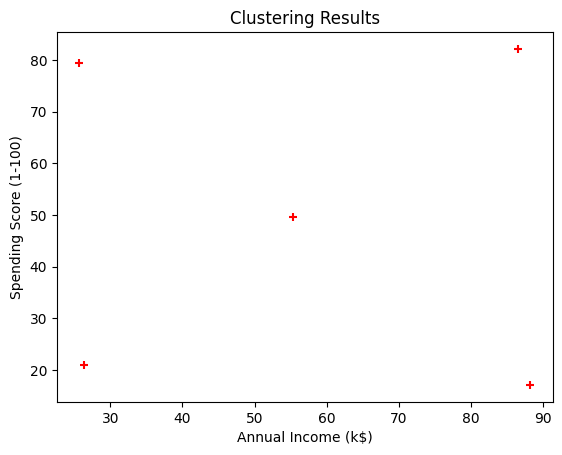

In [7]:
# Labels
plt.title("Clustering Results")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Distribuindo os centroides aos clusters plotados
# Pega todas as linhas (:) e a primeira coluna (0), representando o eixo X.
# Pega todas as linhas (:) e a segunda coluna (1), representando o eixo Y.
plt.scatter(centroides[:,0], centroides[:,1], marker ='+', color='red')

plt.show()

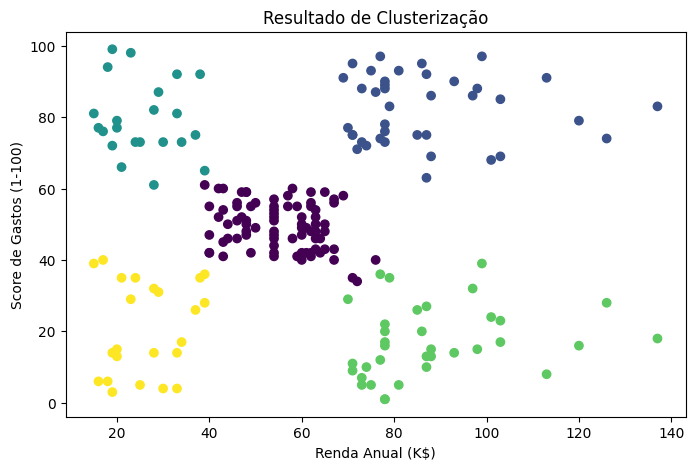

In [10]:
# Plotando clusters em gráfico
plt.figure(figsize=(8, 5))

# Distribuição de dados (X,Y) e definindo cores com o c=predict
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=predict)

# Labels
plt.title("Resultado de Clusterização")
plt.xlabel("Renda Anual (K$)")
plt.ylabel("Score de Gastos (1-100)")

plt.show()

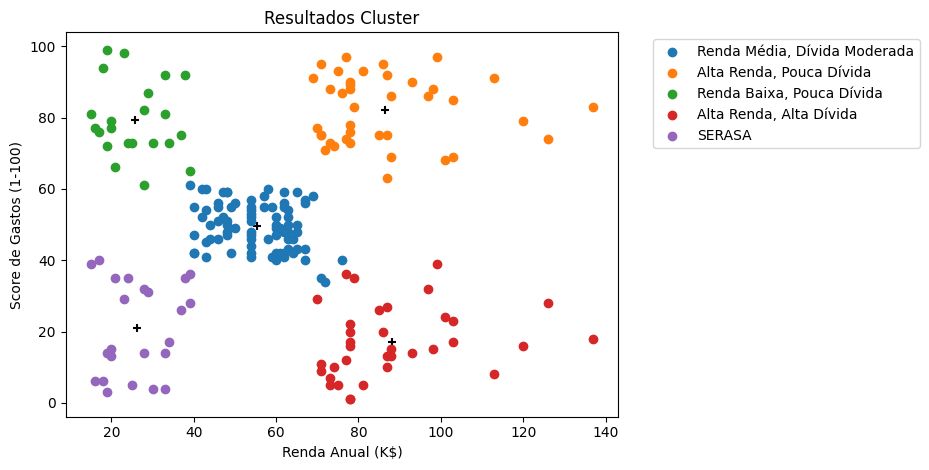

In [9]:
#Labels
plt.title("Resultados Cluster")
plt.xlabel("Renda Anual (K$)")
plt.ylabel("Score de Gastos (1-100)")

#Definindo cada Cliente com base nos Dados Plotados
plt.scatter(centroides[:,0], centroides[:,1], marker ='+', color='black')
plt.scatter(df.loc[predict == 0, "Annual Income (k$)"], df.loc[predict == 0, "Spending Score (1-100)"], label="Renda Média, Dívida Moderada")
plt.scatter(df.loc[predict == 1, "Annual Income (k$)"], df.loc[predict == 1, "Spending Score (1-100)"], label="Alta Renda, Pouca Dívida")
plt.scatter(df.loc[predict == 2, "Annual Income (k$)"], df.loc[predict == 2, "Spending Score (1-100)"], label="Renda Baixa, Pouca Dívida")
plt.scatter(df.loc[predict == 3, "Annual Income (k$)"], df.loc[predict == 3, "Spending Score (1-100)"], label="Alta Renda, Alta Dívida")
plt.scatter(df.loc[predict == 4, "Annual Income (k$)"], df.loc[predict == 4, "Spending Score (1-100)"], label="SERASA")




#Ajusta a legenda para não atrapalhar a visualização dos Dados
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fora do gráfico
plt.show()

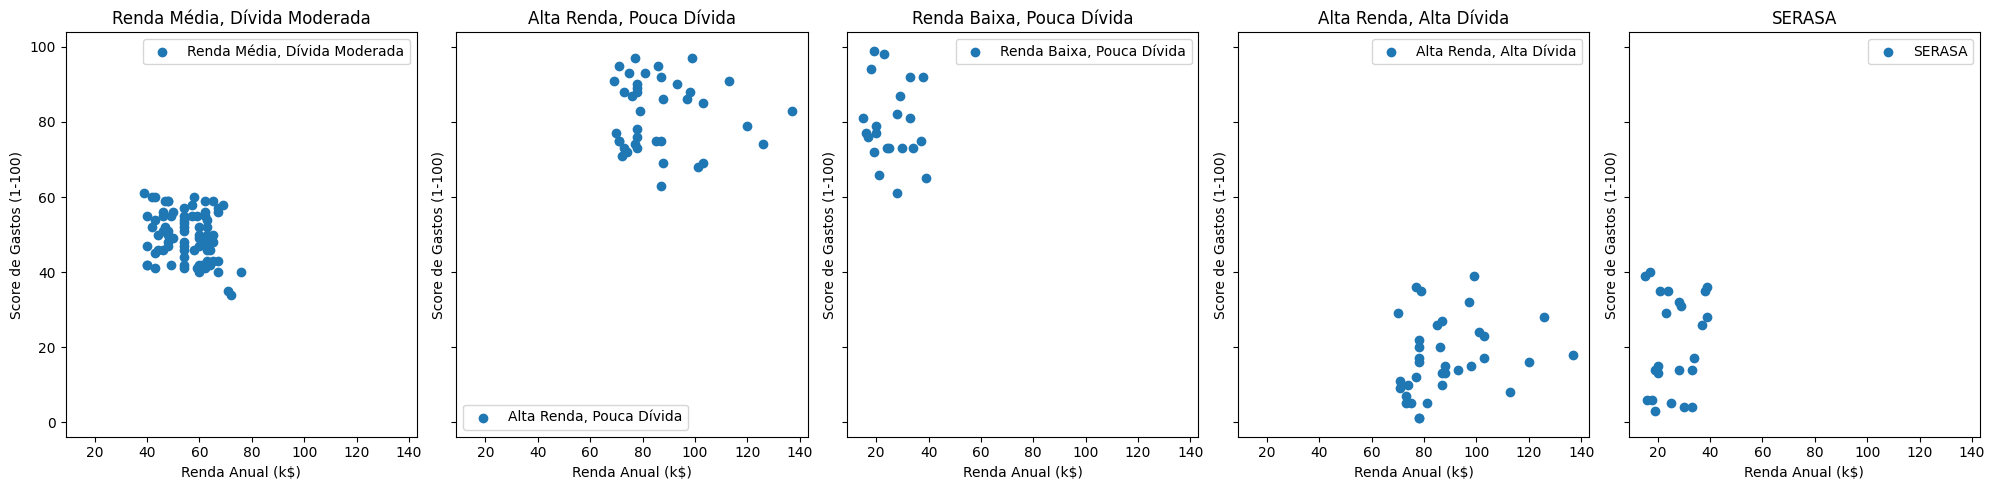

In [11]:
import matplotlib.pyplot as plt

# Número de clusters encontrados
num_clusters = len(set(predict))

# Dê nomes descritivos para cada cluster
cluster_names = {
    0: "Renda Média, Dívida Moderada",
    1: "Alta Renda, Pouca Dívida",
    2: "Renda Baixa, Pouca Dívida",
    3: "Alta Renda, Alta Dívida",
    4: "SERASA"
    # Adicione mais nomes se tiver mais clusters
}

fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5), sharex=True, sharey=True)

for cluster in range(num_clusters):
    axes[cluster].scatter(df.loc[predict == cluster, "Annual Income (k$)"],
                          df.loc[predict == cluster, "Spending Score (1-100)"],
                          label=cluster_names.get(cluster, f"Cluster {cluster}"))

    axes[cluster].set_title(cluster_names.get(cluster, f"Cluster {cluster}"))
    axes[cluster].set_xlabel("Renda Anual (k$)")
    axes[cluster].set_ylabel("Score de Gastos (1-100)")
    axes[cluster].legend()

plt.tight_layout()
plt.show()
